# Importing the required libraries and the given datasets

In [3]:
# Importing the required supporting libraries
!pip install --upgrade jax jaxlib
import numpy as np
import pandas as pd
import tensorflow as tf
import keras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.1/88.1 MB 6.0 MB/s eta 0:00:00
  Attempting uninstall: jaxlib
    Found existing installation: jaxlib 0.4.26+cuda12.cudnn89
    Uninstalling jaxlib-0.4.26+cuda12.cudnn89:
      Successfully uninstalled jaxlib-0.4.26+cuda12.cudnn89
  Attempting uninstall: jax
    Found existing installation: jax 0.4.26
    Uninstalling jax-0.4.26:
      Successfully uninstalled jax-0.4.26


In [4]:
# Installing the tensorflow_decision_forests library
!pip install tensorflow_decision_forests --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 33.3 MB/s eta 0:00:00


In [5]:
import tensorflow_decision_forests as tfdf
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [6]:
# Importing the given .csv files
from google.colab import files
Patient_221 = files.upload()

Saving 221.csv to 221.csv


In [7]:
Patient_230 = files.upload()

Saving 230.csv to 230.csv


# Data Exploration

In [6]:
df_1 = pd.read_csv('221.csv')
df_2 = pd.read_csv('230.csv')

In [7]:
df_1 = pd.DataFrame(df_1)
df_2 = pd.DataFrame(df_2)

In [8]:
df_1.describe()

,RESP,BP-S,BP-D,SpO2,HR,PULSE,Anomaly
count,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000
mean,23.763951,83.889756,121.411656,99.041282,88.562342,87.975439,0.065683
std,4.492832,4.746617,8.966590,1.304528,9.592311,9.219837,0.247731
min,0.000000,66.000000,88.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,81.000000,114.000000,98.000000,81.000000,81.000000,0.000000
50%,23.000000,83.000000,121.000000,99.000000,88.000000,88.000000,0.000000
75%,26.000000,87.000000,129.000000,100.000000,95.000000,95.000000,0.000000
max,42.000000,127.000000,170.000000,100.000000,120.000000,119.000000,1.000000


In [9]:
df_2.describe()

,RESP,BP-S,BP-D,SpO2,HR,PULSE,Anomaly
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,17.621400,53.966440,73.920600,94.526280,77.004120,76.180320,0.031480
std,3.560338,7.752623,10.038658,2.137993,6.611137,5.954691,0.174615
min,0.000000,37.000000,52.000000,81.000000,0.000000,54.000000,0.000000
25%,15.000000,50.000000,67.000000,93.000000,73.000000,72.000000,0.000000
50%,17.000000,54.000000,73.000000,94.000000,76.000000,75.000000,0.000000
75%,20.000000,60.000000,82.000000,96.000000,79.000000,79.000000,0.000000
max,42.000000,211.000000,217.000000,99.000000,131.000000,128.000000,1.000000


Data Cleaning

In [10]:
# Checking for NULL values in any entries of df_1 or df_2
print(df_1.isnull().values.any())
print(df_2.isnull().values.any())

False
False


In [11]:
# Checking for duplicate rows
duplicates_1 = df_1[df_1.duplicated()]
print(duplicates_1)
duplicates_2 = df_2[df_2.duplicated()]
print(duplicates_2)

       RESP  BP-S  BP-D  SpO2  HR  PULSE  Anomaly
6        30    81   120    98  73     73        0
7        30    81   120    98  73     73        0
9        26    81   120    98  74     74        0
13       31    81   120    98  74     75        0
17       27    81   121    98  76     75        0
...     ...   ...   ...   ...  ..    ...      ...
24959    24    78   113   100  91     91        0
24960    24    78   113   100  91     91        0
24965    24    81   117   100  94     94        0
24967    24    81   117   100  95     94        0
24975    24    82   119   100  95     96        0

[9445 rows x 7 columns]
       RESP  BP-S  BP-D  SpO2  HR  PULSE  Anomaly
1        15    54    73    97  72     71        0
2        15    54    73    97  72     71        0
3        15    54    73    97  72     71        0
5        15    55    74    97  72     71        0
7        14    54    73    97  72     71        0
...     ...   ...   ...   ...  ..    ...      ...
24993    19    63    86  

Feature Selection and Data Splitting

In [12]:
from sklearn.preprocessing import MinMaxScaler
scl_1 = MinMaxScaler()
scl_2 = MinMaxScaler()
df_1 = pd.DataFrame(scl_1.fit_transform(df_1), columns=df_1.columns, index=df_1.index)
df_2 = pd.DataFrame(scl_2.fit_transform(df_2), columns=df_2.columns, index=df_2.index)

In [13]:
x1 = df_1.drop('Anomaly', axis=1)
y1 = df_1['Anomaly']
x2 = df_2.drop('Anomaly', axis=1)
y2 = df_2['Anomaly']

In [14]:
# Splitting Data
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1)
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2)

Outlier Detection

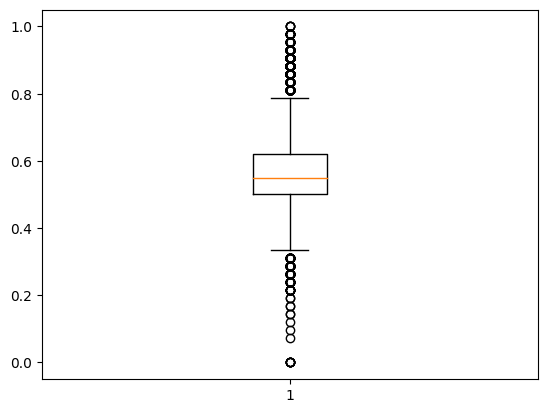

In [15]:
# Replace 'RESP' with any other attribute or df_1 with df_2 to detect outliers in other features or in the other patient
import matplotlib.pyplot as plt
plt.boxplot(df_1['RESP'])
plt.show()

# Implementing ID3 on Patient-1

In [16]:
# Using Scikit-Learn's DecisionTreeClassifier
ID3 = DecisionTreeClassifier(criterion = 'entropy')
ID3.fit(x1_train, y1_train)
P221_pred = ID3.predict(x1_test)
y1_test = np.array(y1_test)

In [17]:
# Testing accuracy score
from sklearn.metrics import accuracy_score
accuracy_method_1 = accuracy_score(y1_test, P221_pred)
print(accuracy_method_1)

0.9944


In [ ]:
# Custom Implementation:

# Implementing CART on Patient-2

In [18]:
# Using Scikit-Learn's DecisionTreeClassifier
cart_sk = DecisionTreeClassifier(criterion = 'gini')
cart_sk.fit(x2_train, y2_train)
P230_pred_sk = cart_sk.predict(x2_test)
y2_test = np.array(y2_test)

In [19]:
# Testing accuracy score
accuracy_score(y2_test, P230_pred_sk)

0.99632

In [20]:
# Using Tensorflow's CartModel
x2_train = np.array(x2_train)
y2_train = np.array(y2_train)
x2_test = np.array(x2_test)
y2_test = np.array(y2_test)
cart_tf = tfdf.keras.RandomForestModel()
cart_tf.fit(x2_train, y2_train)
P230_pred_tf = cart_tf.predict(x2_test)

Use /tmp/tmp1ae2ro0f as temporary training directory
Reading training dataset...
Training dataset read in 0:00:06.347816. Found 18750 examples.
Training model...
Model trained in 0:00:04.147689
Compiling model...
Model compiled.
196/196 [==============================] - 1s 3ms/step


In [21]:
#Converting 2-D arr to 1-D for scoring
P230_pred_tf = P230_pred_tf.flatten()

In [22]:
#As CART gave us an array of continuous values, we will use R² Score
from sklearn.metrics import r2_score
r2 = r2_score(P230_pred_tf, y2_test)
print("R² Score:", r2)

R² Score: 0.8873927958955415


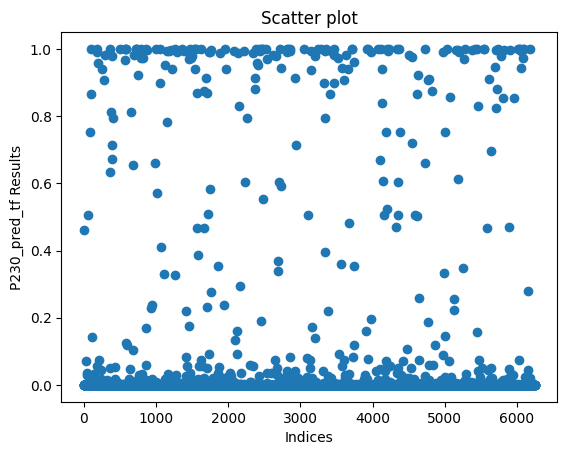

In [23]:
import matplotlib.pyplot as plt
plt.scatter([i for i in range(len(P230_pred_tf))], P230_pred_tf)
plt.title("Scatter plot")
plt.xlabel("Indices")
plt.ylabel("P230_pred_tf Results")
plt.show()

In [24]:
j = P230_pred_tf

for i in range(len(j)):
  if j[i] >= 0.5:
    j[i] = 1
  else:
    j[i] = 0

In [25]:
accuracy_score(y2_test, j)

0.99616

# Analysing results
ID3 is simpler and easier to interpret, it is useful for smaller datasets but requires careful preprocessing and struggles with noisy data.
CART on the other hand can handle outliers and doesn't require require normalization or standardization of features, but has high variance and is unstable. It may cause overfitting.

# Training a Random Forest Model on Patient-1

In [17]:
import tensorflow_decision_forests as tfdf
import pandas as pd
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import train_test_split
import numpy as np

# Load and prepare the data
patient1_data = pd.read_csv('221.csv')
train_data, test_data = train_test_split(patient1_data, test_size=0.2, random_state=42)
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_data, label='PULSE')
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_data, label='PULSE')
# Replace the label with any other column name

In [18]:
# Training the Random Forest model
rf_model = tfdf.keras.RandomForestModel(task=tfdf.keras.Task.CLASSIFICATION)
rf_model.fit(train_ds)

Use /tmp/tmpk19bwabb as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.575177. Found 19999 examples.
Training model...
Model trained in 0:00:51.300095
Compiling model...
Model compiled.


In [19]:
y_pred = rf_model.predict(test_ds) # Predicted classes
y_pred_prob = rf_model.predict(test_ds, verbose=0)  # Predicted probabilities

# Extract true labels from the test data
y_true = test_data['PULSE']

# Convert predicted probabilities to the correct format
y_pred_class = np.argmax(y_pred_prob, axis=1)  # Convert probabilities to predicted class labels

5/5 [==============================] - 1s 284ms/step


In [20]:
# Visualizing the first tree in the trained model
tfdf.model_plotter.plot_model_in_colab(rf_model, tree_idx=0, max_depth=3)

# Additional Tasks

Additional Task 1: Visualizing the hypothesis space by producing the scatter plot of the dataset (MIMIC dataset given)

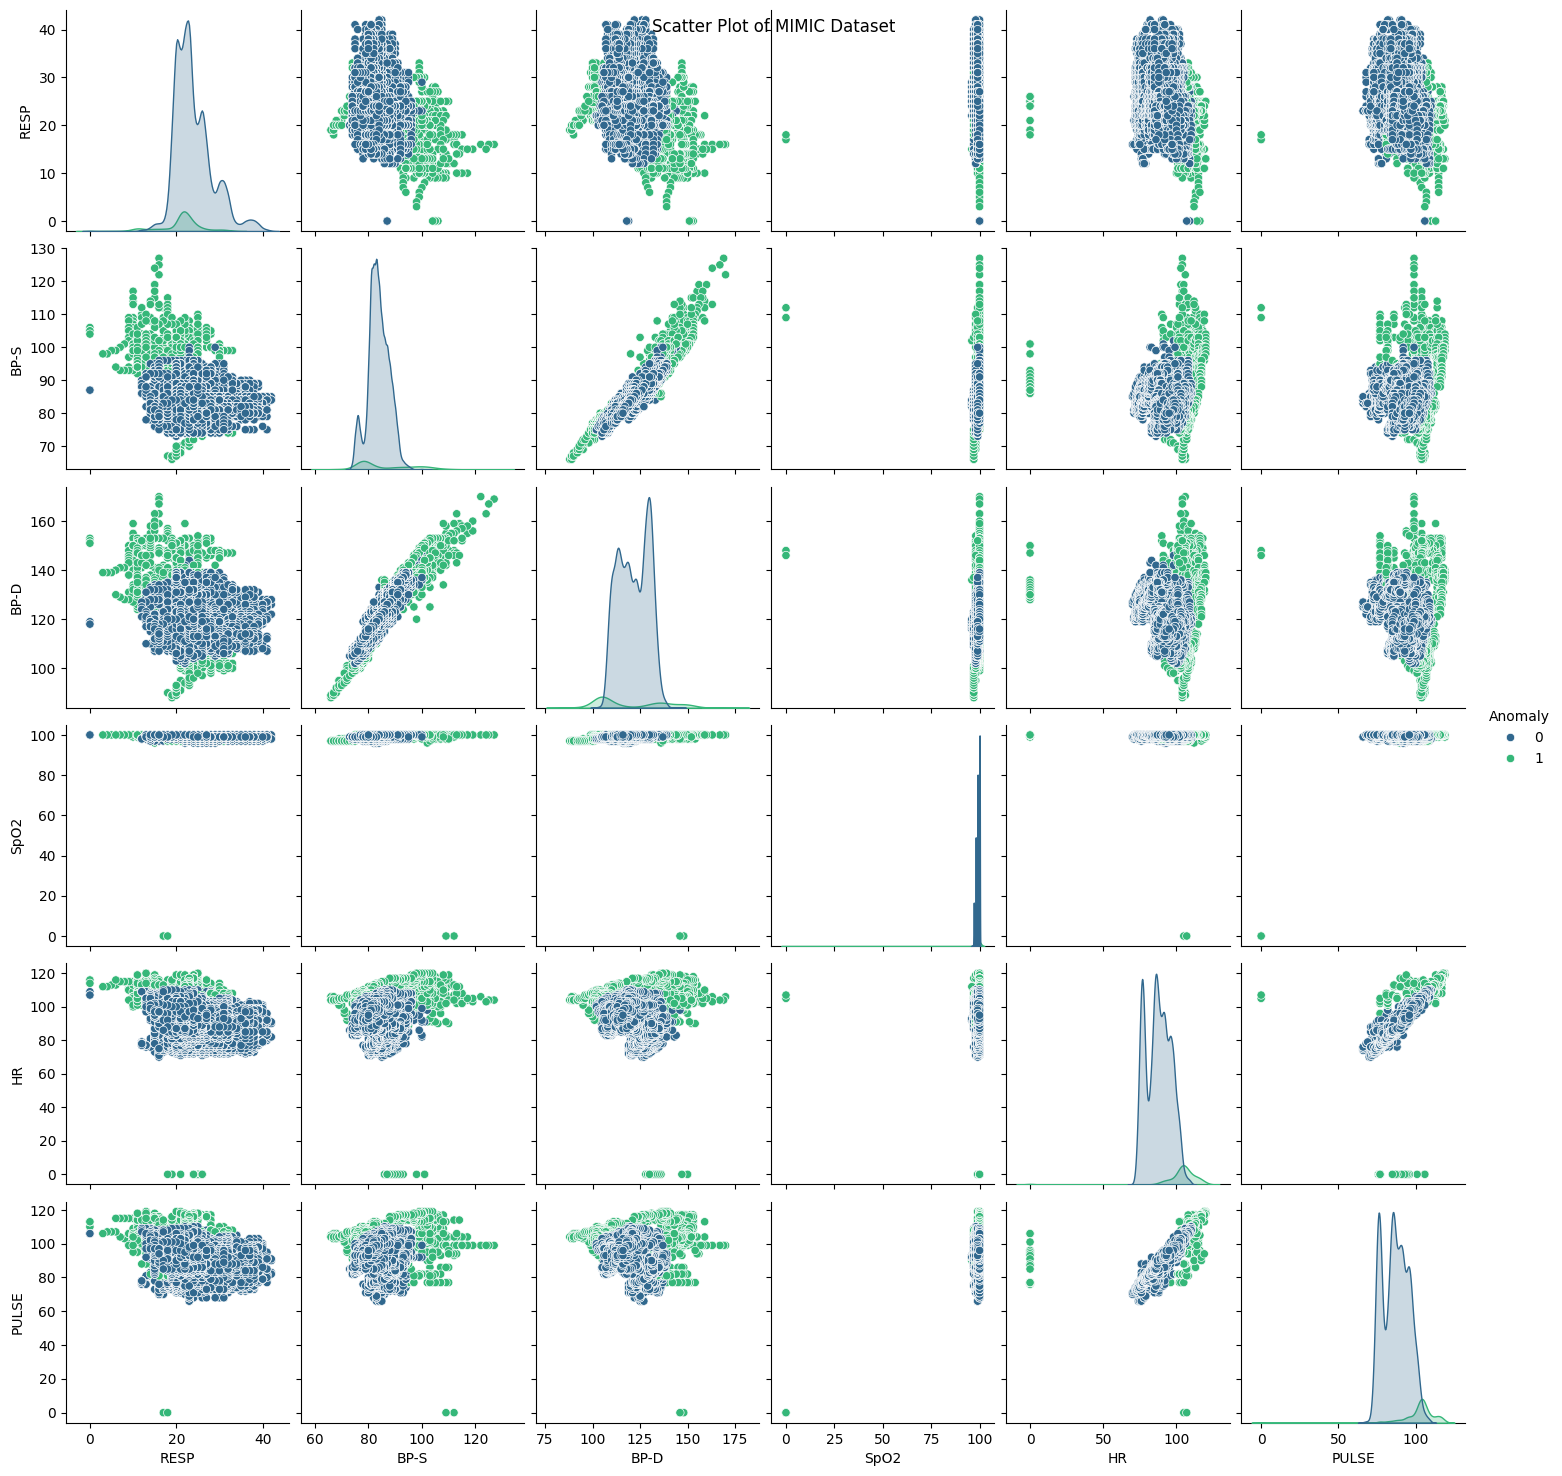

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

mimic_data = pd.read_csv('221.csv')
features = ['RESP', 'BP-S', 'BP-D', 'SpO2', 'HR', 'PULSE']
target = 'Anomaly'
sns.pairplot(mimic_data[features + [target]], hue=target, palette='viridis')
plt.suptitle('Scatter Plot of MIMIC Dataset')
plt.show()

Additional Task 2: Implement Gradient Boosted Decision Trees (GBDT) on patient-2

In [23]:
# Importing the necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, log_loss

# Getting the data and splitting it
data = pd.read_csv('230.csv')
X = data[['RESP', 'BP-S', 'BP-D', 'SpO2', 'HR', 'PULSE']]
Y = data['Anomaly']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=17)

# Defining hyperparameter grids for GBDT
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}

In [24]:
# Training the model
gbdt = GradientBoostingClassifier()
gbdt.fit(X_train, Y_train)
cross_val_score(gbdt, X_train, Y_train, cv=3, n_jobs=-1).mean()

0.9891499724443721

In [25]:
gbdt_grid = GridSearchCV(gbdt, param_grid, cv=3, n_jobs=-1)
gbdt_grid.fit(X_train, Y_train)
# We can add more hyper parameters but it will take very long to execute

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [100, 200]})

In [26]:
print(gbdt_grid.best_params_)
print(gbdt_grid.best_score_)

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
0.996249992480874


In [27]:
# Best GBDT model
best_gbdt = gbdt_grid.best_estimator_
gbdt_accuracy = accuracy_score(Y_test, best_gbdt.predict(X_test))
gbdt_log_loss = log_loss(Y_test, best_gbdt.predict_proba(X_test))

# Printing the accuracy and log loss
print(f"GBDT Accuracy: {gbdt_accuracy:.4f}, Log Loss: {gbdt_log_loss:.4f}")

GBDT Accuracy: 0.9980, Log Loss: 0.0073


Additional Task 3: Feature Importances of RF and GBDT Models

In [28]:
# RF Model
inspector1 = rf_model.make_inspector()
feature_importances1 = inspector1.variable_importances()
print(feature_importances1)

# GBDT Model
feature_importances2 = gbdt.feature_importances_
print(feature_importances2)

{'INV_MEAN_MIN_DEPTH': [("HR" (1; #3), 0.6625758875522881), ("BP-D" (1; #1), 0.23315414080836805), ("BP-S" (1; #2), 0.14254799883773772), ("RESP" (1; #4), 0.1124282748374184), ("SpO2" (1; #5), 0.09734255642262794), ("Anomaly" (1; #0), 0.08956065528922727)], 'SUM_SCORE': [("HR" (1; #3), 11357821.47585398), ("BP-D" (1; #1), 2166328.879385343), ("RESP" (1; #4), 1523680.3966432083), ("BP-S" (1; #2), 1183377.9666500962), ("SpO2" (1; #5), 454182.7281939058), ("Anomaly" (1; #0), 256872.25198744953)], 'NUM_NODES': [("RESP" (1; #4), 263292.0), ("BP-D" (1; #1), 170121.0), ("BP-S" (1; #2), 120561.0), ("SpO2" (1; #5), 50528.0), ("HR" (1; #3), 37161.0), ("Anomaly" (1; #0), 2125.0)], 'NUM_AS_ROOT': [("HR" (1; #3), 198.0), ("BP-D" (1; #1), 89.0), ("SpO2" (1; #5), 13.0)]}
[0.22529033 0.10659545 0.13303492 0.24417673 0.26021394 0.03068863]
